# Hotelling's Experiment

License: BSD (C) 2014, Kyle Cranmer. Feel free to use, distribute, and modify with the above attribution.

This is an example of "Design of Experiments" - using the statistician's terminology - given in the [Wikipedia article](http://en.wikipedia.org/wiki/Design_of_experiments#Example). Aimed to be used for teaching undergraduate-level physics lab / data analysis course.

**The problem is to give the best measurement of the mass of 8 objects using 8 uses of a chemical balance (which has some intrensic measurement error $\sigma=1$.  On a chemical balance, you can put some of your objects on the left and some on the right to measure the difference of their masses.  **

The code below follows the paper 
"On Hotelling's Weighing Problem" by 
Alexander M. Mood
*Ann. Math. Statist.*
Volume 17, Number 4 (1946), 377-556
which you can find [here](http://projecteuclid.org/DPubS?verb=Display&version=1.0&service=UI&handle=euclid.aoms/1177730883&page=record).
The setup is that there is that you provide an "design matrix" that indicates where you should put each of the objects on the scale for each of the 8 weighing operations.  Based on this design matrix, the code will give you the best estimate of the masses for a random experiment.

At the bottom we run 10k experiments and compare the straight-forward approach (ie. measure each object once individually) vs. Hotelling's solution.

<img alt="from wikipedia" src="http://upload.wikimedia.org/wikipedia/commons/1/17/Balance_à_tabac_1850.JPG" width="200" />

In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
import numpy as np
from matplotlib import pyplot as plt

In [71]:
numWeights = 8

In [72]:
class DoExperiment():
    """
    This class performs a weighing experiment given true weights and a design matrix.
        It follows "On Hotelling's Weighing Problem" by 
        Alexander M. Mood *Ann. Math. Statist.*
        Volume 17, Number 4 (1946), 377-556
    """
    def __init__(self, design,truthWeights,withError=True):
        self._truthWeights = truthWeights
        self._design = design
        self._withError = withError
    def get_measurement(self):
        X = self._design # eq.1
        truthWeights = self._truthWeights

        # design is matrix where rows are weighting operations
        # columns are the masses of the objects
        # and entries are +1 (left), -1 (right), or 0 not on balance
        measurements = dot(X,truthWeights) 

        #now add gaussian random error to measurements
        if self._withError:
            measurements += np.random.normal(0,1,len(truthWeights))
        
        #the least squares best estimates of the true weights 
        aij = inv(dot(X.T,X)) #eq 2
        estimates = dot(aij, dot(X,measurements)) #eq 3 & 4
        return estimates                                                        

In [73]:
#get nWeights random numbers for the true weights of the objects
truthWeights = np.random.normal(10,5,numWeights)
truthWeights

array([ 12.24394328,  -0.79755355,  14.3544782 ,  16.13514358,
        11.22801726,  15.08802626,   5.26670499,   2.8890251 ])

In [74]:
#the straight-forward solution to this problem is to weigh each object once.
NaiveDesign= zeros((numWeights,numWeights),int)
np.fill_diagonal(NaiveDesign,1)
NaiveDesign

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [75]:
#The optimal solution to this problem is based on Hadamard Matrices
from scipy.linalg import hadamard
HotellingsDesign = hadamard(numWeights)
HotellingsDesign

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

In [76]:
#test that perfect experiment (with no measurement error) gives
#back the true weights
[abs(residual)<1E-5 for residual in \
 (DoExperiment(HotellingsDesign,truthWeights,withError=False).get_measurement()-truthWeights)]

[True, True, True, True, True, True, True, True]

In [77]:
#Same test for Niave Design
[abs(residual)<1E-5 for residual in \
 (DoExperiment(NaiveDesign,truthWeights,withError=False).get_measurement()-truthWeights)]

[True, True, True, True, True, True, True, True]

standard =  0.995180184266 vs hotelling =  0.356055396504
observed improvement =  2.79501502867
expected improvement =  2.82842712475


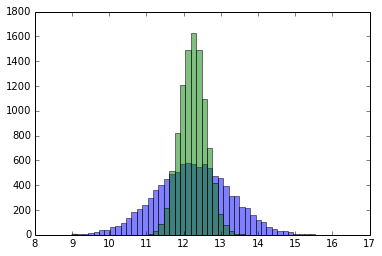

In [78]:
#Ok, now run 10k weighing experiments
#without loss of generality compare measurement of first object
nBins = 50
data_standard = []
data_hotelling = []
for i in range(10000):
    data_standard.append(DoExperiment(NaiveDesign,truthWeights).get_measurement()[0])
    data_hotelling.append(DoExperiment(HotellingsDesign,truthWeights).get_measurement()[0])


print 'standard = ', np.std(data_standard), 'vs hotelling = ', np.std(data_hotelling)
print 'observed improvement = ', np.std(data_standard)/np.std(data_hotelling)
print 'expected improvement = ', sqrt(numWeights)
    
heights, edges, patches = plt.hist(data_standard,bins=nBins, alpha=0.5)
plt.hist(data_hotelling,edges, alpha=0.5)
plt.show()

Nice!

you can see the IPython notebook in GitHub [here](https://github.com/cranmer/play/blob/master/Teaching/HotellingsExperiment.ipynb):

In [58]:
naive_data = np.zeros(numWeights*10000).reshape(10000,numWeights)
hotelling_data = np.zeros(numWeights*10000).reshape(10000,numWeights)

for i in range(10000):
    naive_data[i] = DoExperiment(NaiveDesign,truthWeights).get_measurement()
    hotelling_data[i] = DoExperiment(HotellingsDesign,truthWeights).get_measurement()

In [59]:
naive_data[1]

array([ 14.05987515,   2.01681763])

[[ 1.         -0.00363132]
 [-0.00363132  1.        ]]
[[ 1.          0.03753298]
 [ 0.03753298  1.        ]]


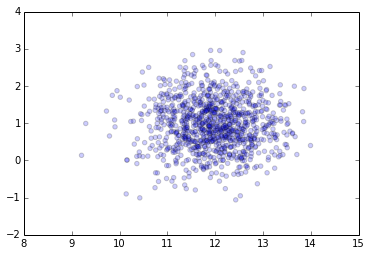

In [60]:
plt.scatter(hotelling_data[:1000,0],hotelling_data[:1000,1],alpha=0.2)
#plt.scatter(naive_data[:1000,0],hotelling_data[:1000,1],c='r',alpha=0.2)
print np.corrcoef(hotelling_data[:1000,0],hotelling_data[:1000,1])
print np.corrcoef(naive_data[:1000,0],hotelling_data[:1000,1])

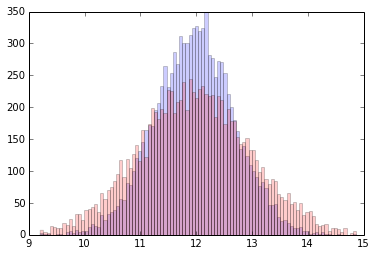

In [61]:
cont, edges, patches = plt.hist(hotelling_data[:,0],bins=100,alpha=0.2)
cont, edges, patches = plt.hist(naive_data[:,0],bins=edges,color='r',alpha=0.2)

array([[ 1.       ,  0.4934457],
       [ 0.4934457,  1.       ]])

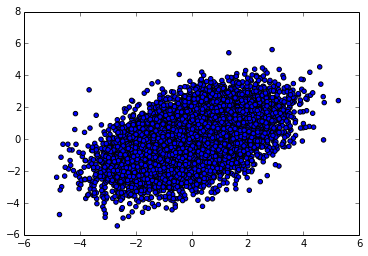

In [68]:
w1 = np.random.normal(0,1,10000)
w2 = np.random.normal(0,1,10000)
w3 = np.random.normal(0,1,10000)
m1 = (w1+w3)
m2 = (w2+w3)
plt.scatter(m1,m2)
np.corrcoef(m1,m2)